In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df_1 = df[df['booking_complete'] == 1]

In [8]:
df_g_sales = df_1.groupby(['sales_channel']).agg({'booking_complete':'count'})

In [9]:
df_g_sales

,booking_complete
sales_channel,
Internet,6869
Mobile,609


<AxesSubplot:xlabel='sales_channel'>

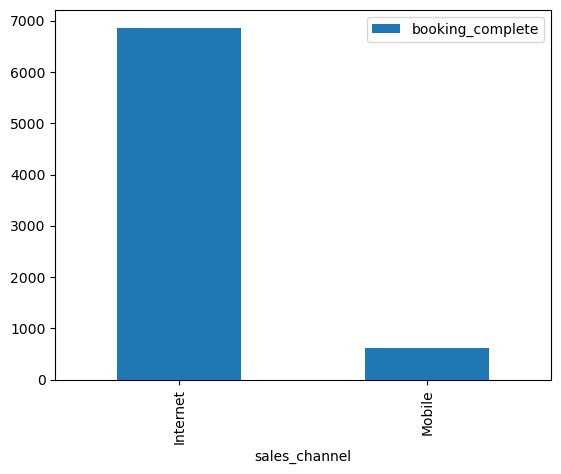

In [10]:
#Internet dominates mobile booking
df_g_sales.plot(kind='bar')

In [11]:
df_g_trip = df_1.groupby(['trip_type']).agg({'booking_complete':'count'})

In [12]:
df_g_trip

,booking_complete
trip_type,
CircleTrip,5
OneWay,20
RoundTrip,7453


<AxesSubplot:xlabel='trip_type'>

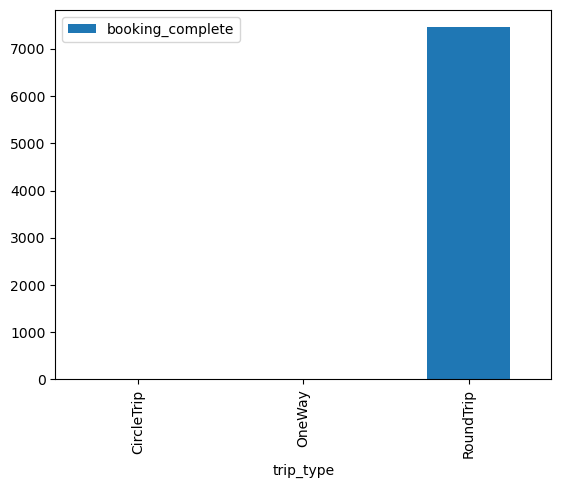

In [13]:
# One way and circle trip booking are negligible when compared to Round trip bookings
df_g_trip.plot(kind='bar')

In [14]:
df_g_origin = df_1.groupby(['booking_origin']).agg({'booking_complete':'count'})

In [15]:
df_g_origin.head(5)

,booking_complete
booking_origin,
(not set),14
Australia,900
Bahrain,3
Bangladesh,2
Belgium,1


In [16]:
df_g_origin_filetered = df_g_origin[df_g_origin['booking_complete']>100]

<AxesSubplot:xlabel='booking_origin'>

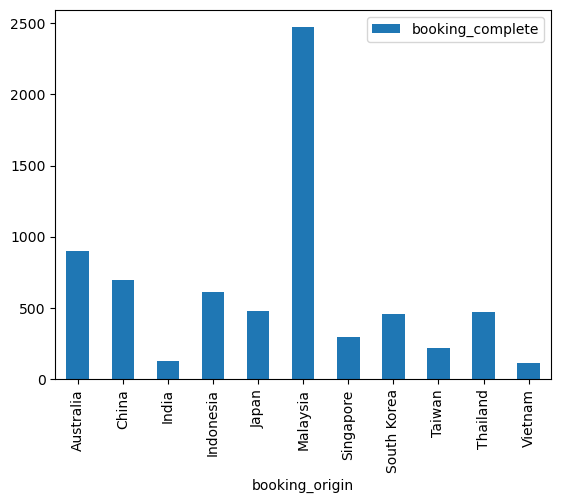

In [17]:
# Malaysia has the most number of booking which is surprising since most website visits were from Australia
df_g_origin_filetered.plot(kind='bar')

In [18]:
df_g_day = df_1.groupby(['flight_day']).agg({'booking_complete':'count'})

<AxesSubplot:xlabel='flight_day'>

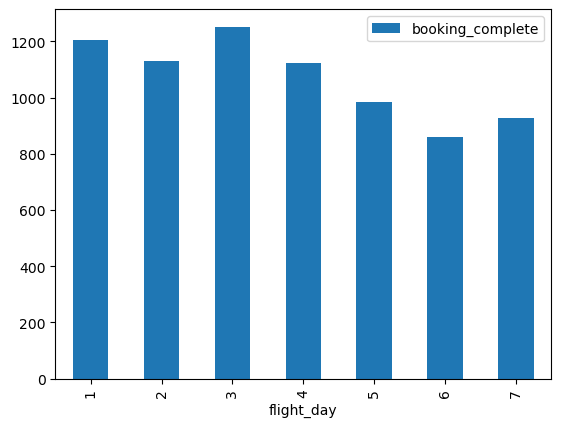

In [19]:
# Day of the week has minimal impact on booking
df_g_day.plot(kind='bar')

In [20]:
df_g_baggage = df_1.groupby(['wants_extra_baggage']).agg({'booking_complete':'count'})

<AxesSubplot:xlabel='wants_extra_baggage'>

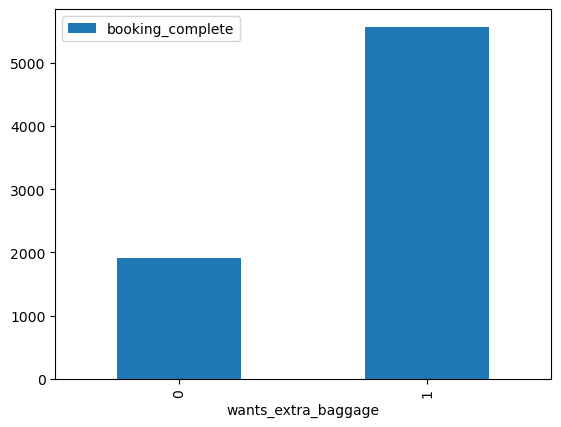

In [21]:
df_g_baggage.plot(kind='bar')

In [22]:
# Correlation of booking with other features
df.corr()['booking_complete']

num_passengers           0.024116
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_hour              0.007127
flight_day              -0.006986
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
flight_duration         -0.106266
booking_complete         1.000000
Name: booking_complete, dtype: float64

In [23]:
df_book = df['booking_origin'].value_counts().rename_axis('Country').reset_index(name='counts')

In [24]:
# since there are a lot of countries with negligible amount of flights, we will ignore them.
df_book[df_book['counts']>2000]

,Country,counts
0,Australia,17872
1,Malaysia,7174
2,South Korea,4559
3,Japan,3885
4,China,3387
5,Indonesia,2369
6,Taiwan,2077
7,Thailand,2030


In [25]:
df_11=(df.query("booking_origin in ('Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Indonesia', 'Taiwan', 'Thailand')"))

In [26]:
df_11.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
19,1,Internet,RoundTrip,351,17,3,7,AKLHGH,China,0,0,0,5.07,0
21,1,Internet,RoundTrip,21,88,9,3,AKLICN,South Korea,1,0,1,6.62,0
23,2,Internet,RoundTrip,25,27,13,5,AKLICN,South Korea,1,0,1,6.62,0
25,1,Internet,RoundTrip,66,20,7,4,AKLICN,South Korea,1,0,0,6.62,0
26,1,Internet,RoundTrip,51,28,6,5,AKLICN,South Korea,0,0,0,6.62,0


In [27]:
df_final = pd.get_dummies(df_11[['sales_channel','trip_type','flight_day','booking_origin']])

In [28]:
df_final

,flight_day,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_origin_Australia,booking_origin_China,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
19,7,1,0,0,0,1,0,1,0,0,0,0,0,0
21,3,1,0,0,0,1,0,0,0,0,0,1,0,0
23,5,1,0,0,0,1,0,0,0,0,0,1,0,0
25,4,1,0,0,0,1,0,0,0,0,0,1,0,0
26,5,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6,1,0,0,0,1,1,0,0,0,0,0,0,0
49996,7,1,0,0,0,1,1,0,0,0,0,0,0,0
49997,6,1,0,0,0,1,1,0,0,0,0,0,0,0
49998,1,1,0,0,0,1,1,0,0,0,0,0,0,0


In [29]:
df_final = pd.concat([df_11, df_final], axis=1, join="inner")

In [30]:
df_final.head(6)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,trip_type_OneWay,trip_type_RoundTrip,booking_origin_Australia,booking_origin_China,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
19,1,Internet,RoundTrip,351,17,3,7,AKLHGH,China,0,...,0,1,0,1,0,0,0,0,0,0
21,1,Internet,RoundTrip,21,88,9,3,AKLICN,South Korea,1,...,0,1,0,0,0,0,0,1,0,0
23,2,Internet,RoundTrip,25,27,13,5,AKLICN,South Korea,1,...,0,1,0,0,0,0,0,1,0,0
25,1,Internet,RoundTrip,66,20,7,4,AKLICN,South Korea,1,...,0,1,0,0,0,0,0,1,0,0
26,1,Internet,RoundTrip,51,28,6,5,AKLICN,South Korea,0,...,0,1,0,0,0,0,0,1,0,0
28,1,Internet,RoundTrip,101,19,11,2,AKLICN,South Korea,1,...,0,1,0,0,0,0,0,1,0,0


In [31]:
df_final.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'flight_day', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'booking_origin_Australia', 'booking_origin_China',
       'booking_origin_Indonesia', 'booking_origin_Japan',
       'booking_origin_Malaysia', 'booking_origin_South Korea',
       'booking_origin_Taiwan', 'booking_origin_Thailand'],
      dtype='object')

In [32]:
df_final = df_final.drop(columns = ['sales_channel','trip_type','flight_day','route','booking_origin'])

In [33]:
df_final.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'booking_origin_Australia',
       'booking_origin_China', 'booking_origin_Indonesia',
       'booking_origin_Japan', 'booking_origin_Malaysia',
       'booking_origin_South Korea', 'booking_origin_Taiwan',
       'booking_origin_Thailand'],
      dtype='object')

In [34]:
clf = RandomForestClassifier(random_state=0)

In [35]:
X = df_final.drop(columns = ['booking_complete'])
y = df_final['booking_complete']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
predictions = clf.predict(X_test)

In [39]:
confusion_matrix(y_test, predictions)

array([[11822,   415],
       [ 1787,   283]], dtype=int64)

In [40]:
accuracy_score(y_test, predictions)

0.8460893269029146

In [41]:
feature_importance = clf.feature_importances_

In [42]:
feature_importance

array([6.04972805e-02, 2.97012494e-01, 1.71034147e-01, 1.97205692e-01,
       1.70102009e-02, 1.86749282e-02, 2.43726380e-02, 9.88331554e-02,
       5.62218869e-03, 5.56579223e-03, 1.47982444e-04, 7.20144982e-04,
       8.13614426e-04, 2.49643706e-02, 4.84923199e-03, 7.87172847e-03,
       4.51020191e-03, 4.35176234e-02, 6.72017580e-03, 4.49399340e-03,
       5.56241495e-03])

In [43]:
features = df_final.columns

In [44]:
feature_series = pd.DataFrame(features)

In [45]:
feature_series

,0
0,num_passengers
1,purchase_lead
2,length_of_stay
3,flight_hour
4,wants_extra_baggage
5,wants_preferred_seat
6,wants_in_flight_meals
7,flight_duration
8,booking_complete
9,sales_channel_Internet


In [48]:
feature_importance = pd.DataFrame(feature_importance)

In [49]:
feature_importance

,0
0,0.060497
1,0.297012
2,0.171034
3,0.197206
4,0.017010
5,0.018675
6,0.024373
7,0.098833
8,0.005622
9,0.005566


In [55]:
features = feature_series
features = features.drop([8]).reset_index()
features

,index,0
0,0,num_passengers
1,1,purchase_lead
2,2,length_of_stay
3,3,flight_hour
4,4,wants_extra_baggage
5,5,wants_preferred_seat
6,6,wants_in_flight_meals
7,7,flight_duration
8,9,sales_channel_Internet
9,10,sales_channel_Mobile


In [54]:
feature_series

,0
0,num_passengers
1,purchase_lead
2,length_of_stay
3,flight_hour
4,wants_extra_baggage
5,wants_preferred_seat
6,wants_in_flight_meals
7,flight_duration
8,booking_complete
9,sales_channel_Internet


In [56]:
features.drop(columns = ['index'], inplace = True)

In [57]:
features.columns = ['Feature']

In [58]:
features

,Feature
0,num_passengers
1,purchase_lead
2,length_of_stay
3,flight_hour
4,wants_extra_baggage
5,wants_preferred_seat
6,wants_in_flight_meals
7,flight_duration
8,sales_channel_Internet
9,sales_channel_Mobile


In [59]:
feature_importance_df = pd.concat([features, feature_importance],axis = 1)

In [60]:
feature_importance_df.columns = ['Feature', 'Feature_importance']

In [61]:
feature_importance_df.head(5)

,Feature,Feature_importance
0,num_passengers,0.060497
1,purchase_lead,0.297012
2,length_of_stay,0.171034
3,flight_hour,0.197206
4,wants_extra_baggage,0.017010


In [62]:
feature_importance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feature             21 non-null     object 
 1   Feature_importance  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


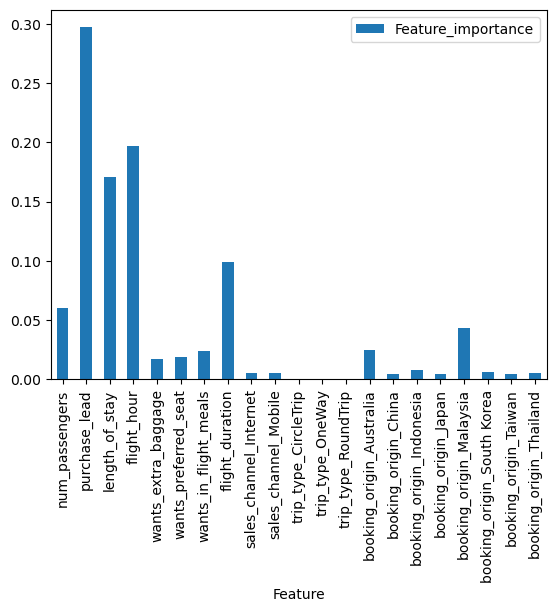

In [63]:
feature_importance_df.plot(kind='bar', x='Feature', y='Feature_importance')
plt.show()